In [59]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import re
# from scipy import signal
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [234]:
data = pd.read_csv('data_scaled.csv')

In [235]:
data.head()

,x,y,z,activity
0,0.457376,0.689453,0.421540,Walking
1,0.438482,0.717446,0.420169,Walking
2,0.544191,0.755916,0.477840,Walking
3,0.487291,0.800191,0.390204,Walking
4,0.391350,0.836838,0.224368,Walking


In [236]:
import numpy as np
from scipy.stats import skew, kurtosis

data['x_mean_rolling'] = data['x'].rolling(window=10).mean().fillna(0)
data['y_mean_rolling'] = data['y'].rolling(window=10).mean().fillna(0)
data['z_mean_rolling'] = data['z'].rolling(window=10).mean().fillna(0)

data['x_std_rolling'] = data['x'].rolling(window=10).std().fillna(0)
data['y_std_rolling'] = data['y'].rolling(window=10).std().fillna(0)
data['z_std_rolling'] = data['z'].rolling(window=10).std().fillna(0)

data['x_median_rolling'] = data['x'].rolling(window=10).median().fillna(0)
data['y_median_rolling'] = data['y'].rolling(window=10).median().fillna(0)
data['z_median_rolling'] = data['z'].rolling(window=10).median().fillna(0)

data['x_max_rolling'] = data['x'].rolling(window=10).max().fillna(0)
data['x_min_rolling'] = data['x'].rolling(window=10).min().fillna(0)
data['x_range_rolling'] = data['x_max_rolling'] - data['x_min_rolling']

data['y_max_rolling'] = data['y'].rolling(window=10).max().fillna(0)
data['y_min_rolling'] = data['y'].rolling(window=10).min().fillna(0)
data['y_range_rolling'] = data['y_max_rolling'] - data['y_min_rolling']

data['z_max_rolling'] = data['z'].rolling(window=10).max().fillna(0)
data['z_min_rolling'] = data['z'].rolling(window=10).min().fillna(0)
data['z_range_rolling'] = data['z_max_rolling'] - data['z_min_rolling']



In [237]:
X = data.drop(columns=['activity','x','y','z'])
y = data['activity']


In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# RFC

In [240]:
import time
start=time.time()
rf = RandomForestClassifier(n_estimators=200,max_depth=20,n_jobs=-1)
rf.fit(X_train, y_train)
stop=time.time()
print(stop-start)

145.563556432724


In [246]:
# import  pickle
# pickle.dump(rf, open('rfc_model', 'wb'))

In [241]:
y_pred = rf.predict(X_test)

In [242]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.954771505894508


In [131]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_good = label_encoder.fit_transform(y_train)
y_test_good = label_encoder.fit_transform(y_test)

In [247]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

                             precision    recall  f1-score   support

             Brushing Teeth       0.99      0.98      0.98      7207
                   Clapping       0.98      0.99      0.99      6419
     Dribbling (Basketball)       0.87      0.89      0.88      6451
          Drinking from Cup       1.00      1.00      1.00      8075
               Eating Chips       0.99      0.99      0.99      8069
               Eating Pasta       0.99      0.98      0.98      7364
            Eating Sandwich       0.99      1.00      0.99      8194
                Eating Soup       0.99      0.99      0.99      8158
            Folding Clothes       0.94      0.93      0.94      6599
                    Jogging       0.96      0.98      0.97      7190
      Kicking (Soccer Ball)       0.86      0.72      0.78      6277
Playing Catch w/Tennis Ball       0.83      0.86      0.84      6412
                    Sitting       1.00      1.00      1.00      7242
                     Stairs      

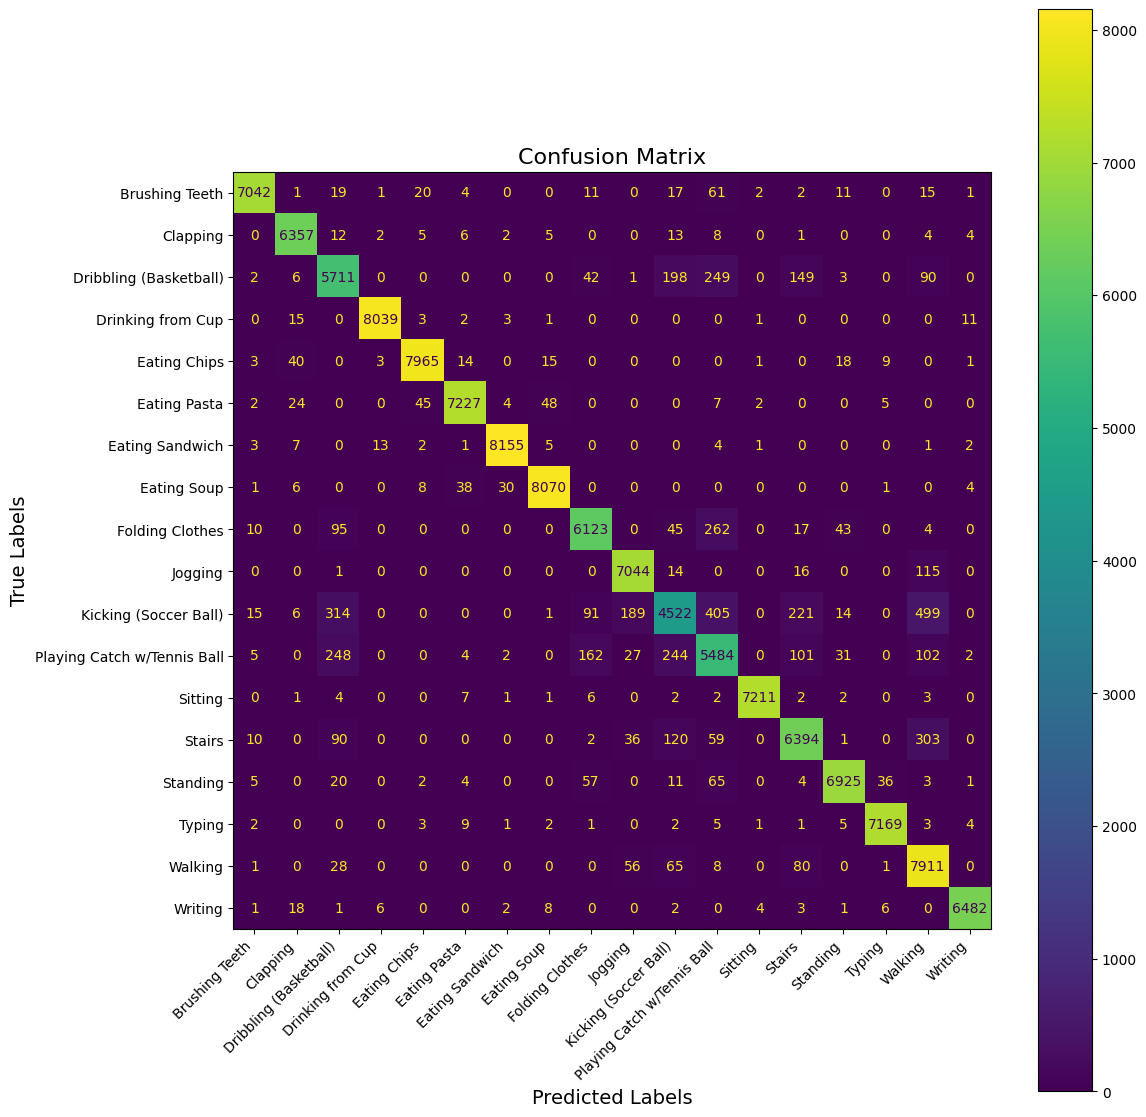

In [250]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, cmap='viridis', colorbar=True)


plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)


plt.tight_layout()
plt.show()


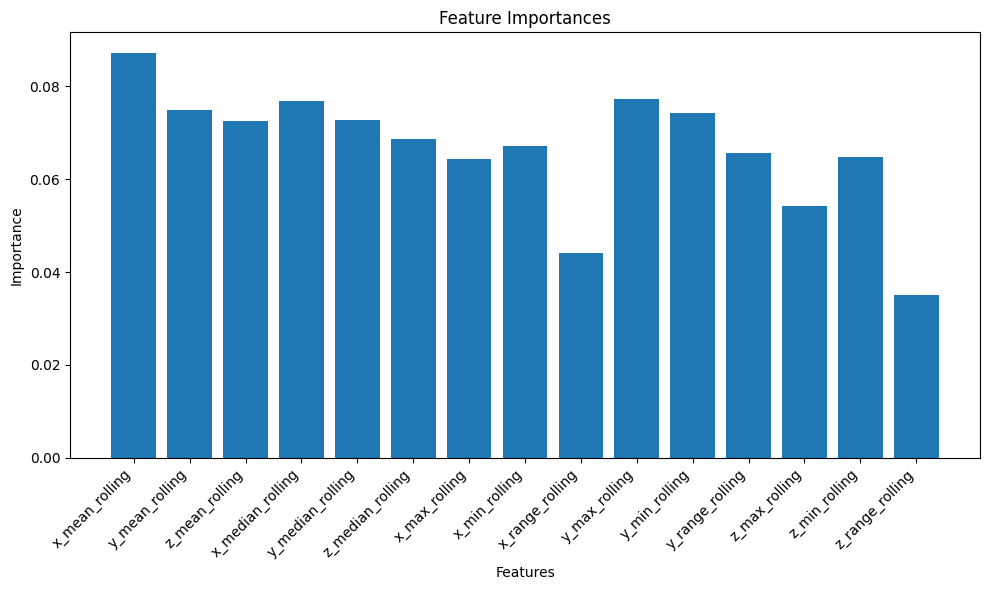

In [245]:
import matplotlib.pyplot as plt


feature_importances = rf.feature_importances_
features = X.columns


plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=features)
plt.xticks(rotation=45, ha='right')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [257]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train, y_train, cv=3, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Scores: [0.94778752 0.9465211  0.94700685]
Mean CV Accuracy: 0.95


In [74]:
data['activity'].value_counts()

activity
Eating Sandwich                41277
Eating Soup                    41272
Drinking from Cup              40681
Eating Chips                   40283
Walking                        40190
Eating Pasta                   36767
Sitting                        36154
Brushing Teeth                 35917
Typing                         35905
Standing                       35899
Jogging                        35745
Stairs                         34358
Folding Clothes                33273
Writing                        32583
Dribbling (Basketball)         32349
Clapping                       32324
Playing Catch w/Tennis Ball    32015
Kicking (Soccer Ball)          31489
Name: count, dtype: int64

In [44]:
# data.to_csv('data_scaled.csv', header=True, index=False)

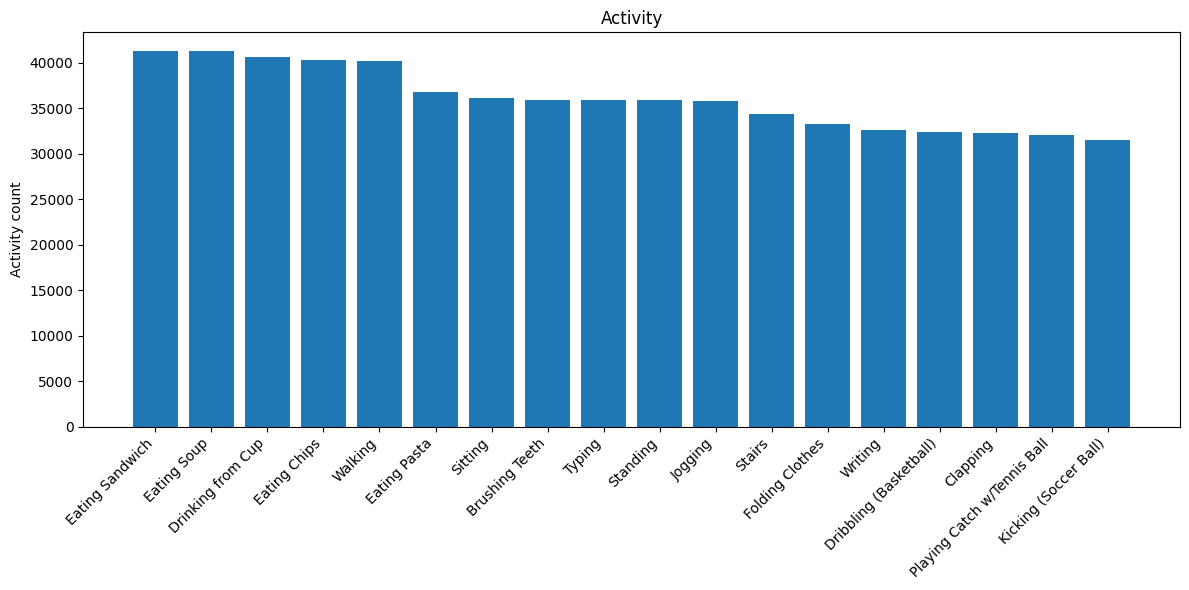

In [154]:
fig = plt.figure(figsize=(12, 6))
labels = []
label_counts = []
# Place keys and values into list to maintain order.
for k, v in data.activity.value_counts(dropna=False).items():
    labels.append(k)
    label_counts.append(v)
y = np.arange(len(labels))
plt.bar(y, label_counts )
plt.xticks(y, labels, rotation=45, ha="right")
plt.xticks(y, labels)
plt.ylabel('Activity count')
plt.title('Activity')
plt.tight_layout()
plt.show()
fig.savefig('plot')